In [9]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__, keras.__version__)

1.13.1 2.2.4-tf


In [38]:
tf.enable_eager_execution()

(1, 3, 3, 1)


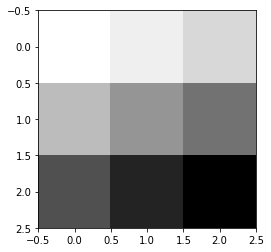

In [12]:
image = tf.constant([[
    [[1], [2], [3]],
    [[4], [5], [6]],
    [[7], [8], [9]]
    ]], dtype=np.float32)   # 3차원 이미지 1개
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')  # 그릴 때는 2차원
plt.show()

In [13]:
weight = np.array([
    [[[1.]], [[1.]]],
    [[[1.]], [[1.]]]
                  ])
print(weight.shape)

(2, 2, 1, 1)


Instructions for updating:
Colocations handled automatically by placer.
conv2d.shape (1, 2, 2, 1)
 tf.Tensor(
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]], shape=(1, 2, 2, 1), dtype=float32)
 [[12. 16.]
 [24. 28.]]


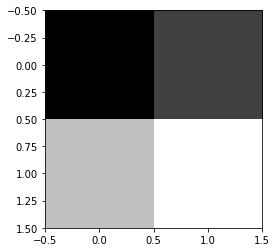

In [14]:
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                             kernel_initializer=weight_init)(image)

print('conv2d.shape', conv2d.shape)
print('==============\n', conv2d)
print('==============\n', conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

conv2d.shape (1, 2, 2, 1)
 tf.Tensor(
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]], shape=(1, 2, 2, 1), dtype=float32)
 [[12. 16.]
 [24. 28.]]


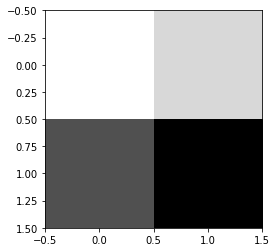

In [15]:
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                             kernel_initializer=weight_init)(image)

print('conv2d.shape', conv2d.shape)
print('==============\n', conv2d)
print('==============\n', conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='Greys')  #cf. gray
plt.show()

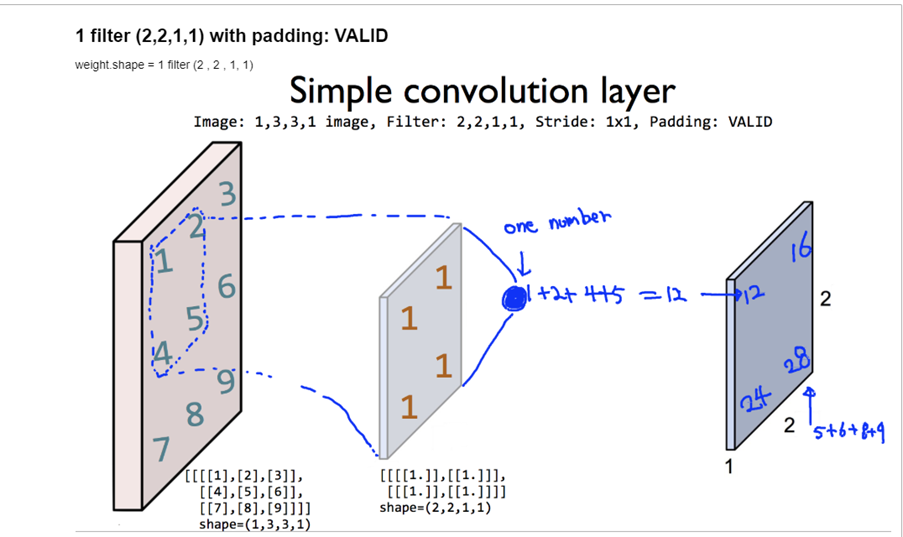

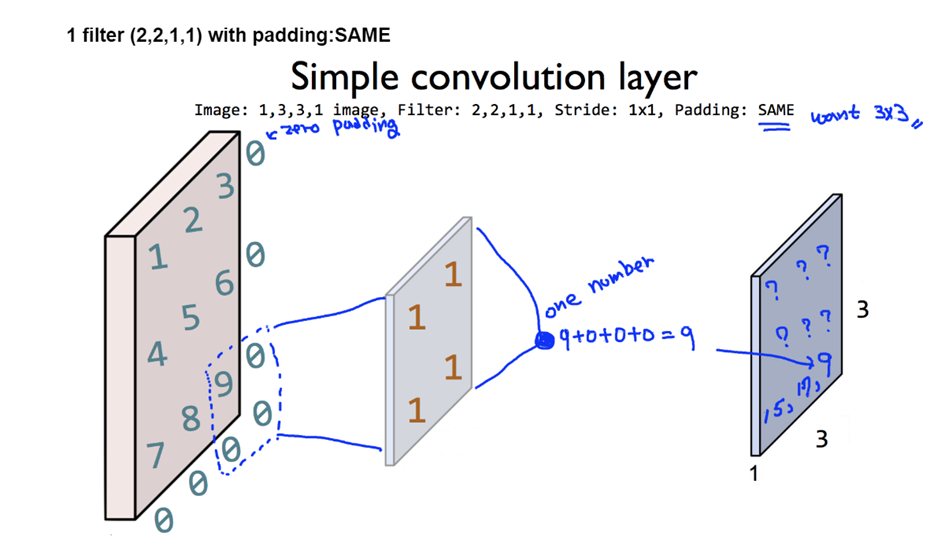

## padding

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
conv2d:
 tf.Tensor(
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]], shape=(1, 3, 3, 1), dtype=float32)
conv2d.numpy():
 [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


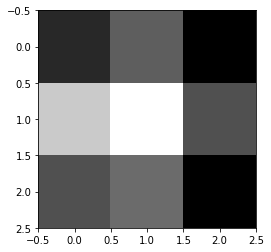

In [16]:
image = tf.constant([[
    [[1], [2], [3]],
    [[4], [5], [6]],
    [[7], [8], [9]]
    ]], dtype=np.float32)   # 3차원 이미지 1개
print('image.shape', image.shape)

weight = np.array([
    [[[1.]], [[1.]]],
    [[[1.]], [[1.]]]
                  ])
print('weight.shape', weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print('===================================\nconv2d.shape', conv2d.shape)
print('===================================\nconv2d:\n', conv2d)
print('===================================\nconv2d.numpy():\n', conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

# tf.Tensor -> Variable. 값은 바꿀 수 있는데, 형태는 바꿀 수 없음.

## 3 filters

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
conv2d:
 tf.Tensor(
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]], shape=(1, 3, 3, 3), dtype=float32)
feature_maps.shape:
 (3, 3, 3, 1)
feature_maps:
 [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
feature_map.reshape(3,3):
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


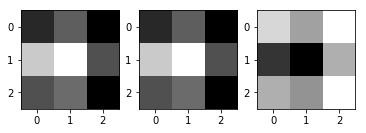

In [19]:
image = tf.constant([[
    [[1], [2], [3]],
    [[4], [5], [6]],
    [[7], [8], [9]]
    ]], dtype=np.float32)   # 3차원 이미지 1개
print('image.shape', image.shape)

weight = np.array([
    [[[1., 10., -1.]], [[1., 10., -1.]]],
    [[[1., 10., -1.]], [[1., 10., -1.]]]
                  ])
print('weight.shape', weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print('===================================\nconv2d.shape', conv2d.shape)

print('===================================\nconv2d:\n', conv2d)

feature_maps = np.swapaxes(conv2d, 0, 3) # np.swapaxes(배열, 인덱스1, 인덱스2): 인덱스1과 2의 구조를 교환

print('===================================\nfeature_maps.shape:\n', feature_maps.shape)

print('===================================\nfeature_maps:\n', feature_maps)


# 4차원이어서 그림으로 만들 수 없음. 2차원으로 변환.
print('===================================\nfeature_map.reshape(3,3):')

for i, feature_map in enumerate(feature_maps):         # for문으로 4차원 -> 3차원
    print(feature_map.reshape(3,3))                    # reshape으로 3차원 -> 2차원
    plt.subplot(1, 3, i+1), plt.imshow(feature_map.reshape(3,3),
                                    cmap='gray')
    
plt.show()

## max pooling
 - 앞서 컨볼루션 층을 통해 이미지 특징을 도출하였음
 - 그 결과가 여전히 크고 복잡하기 때문에  이를 다시 한번 축소해야 함
 - 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라고 함
 - 풀링 기법 중 가장 많이 사용되는 방법이 맥스 풀링(max pooling)
 - 맥스 풀링은 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림
#### 다음과 같은 컨볼루션 층이 있을 때,

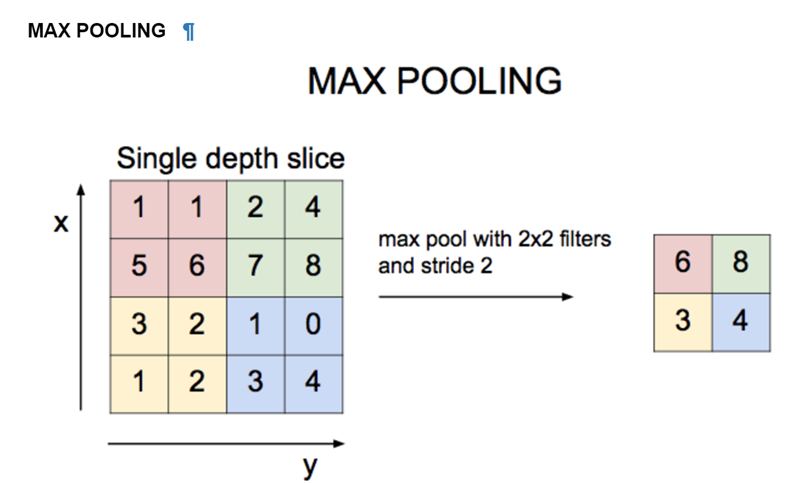

### VALID: Zero paddings
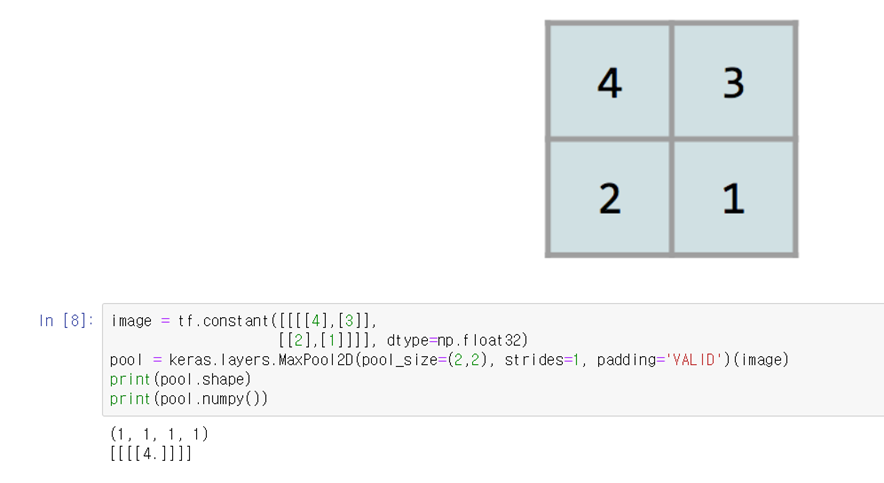

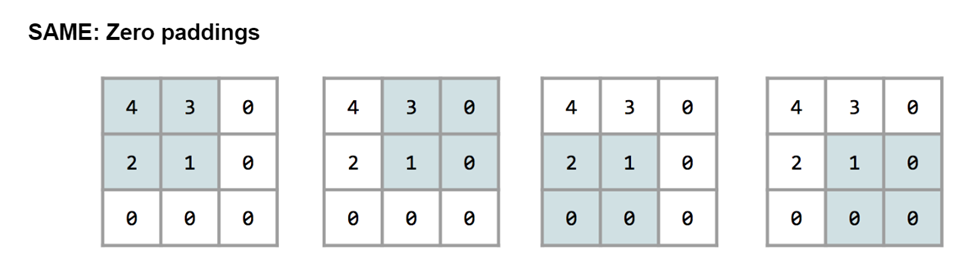

In [52]:
image = tf.constant([[
    [[4], [3]],
    [[2], [1]]]], dtype=np.float32)

pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)

print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
# pool_size와 strides에 따라서 zero padding 생성! (오른쪽, 밑이 우선순위여서 위와 같이 생성됨. size와
# strides에 따라 모양이 안만들어지면 0이 한 바퀴 감는 모양으로 생길 수도 있었음.)

- MNIST data

In [20]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

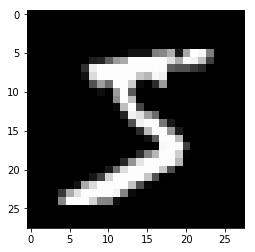

In [24]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

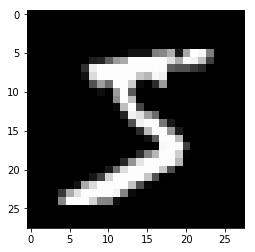

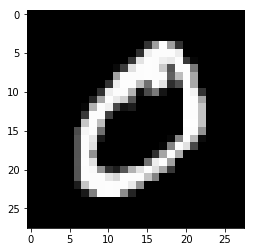

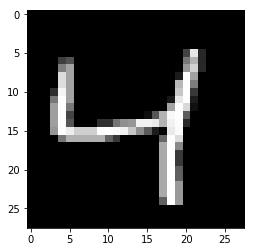

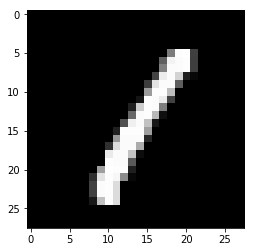

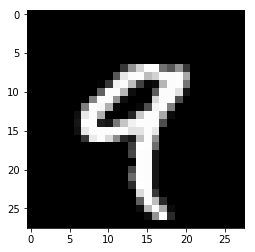

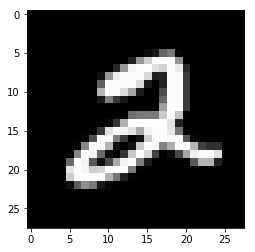

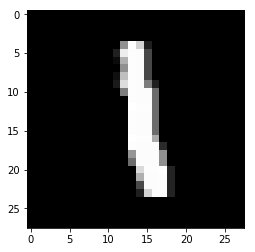

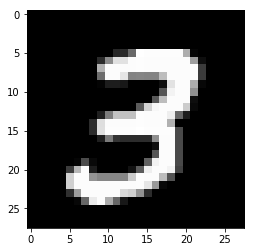

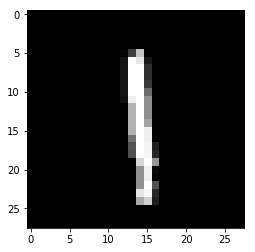

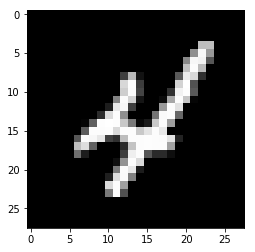

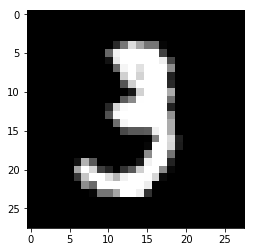

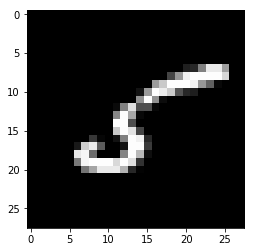

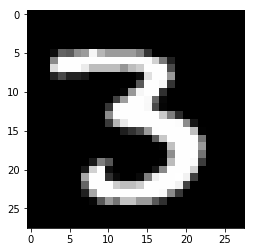

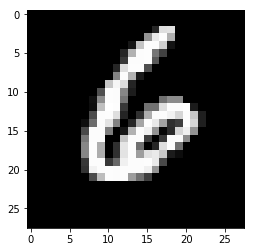

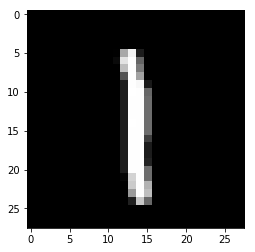

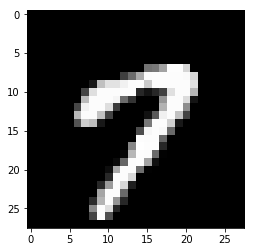

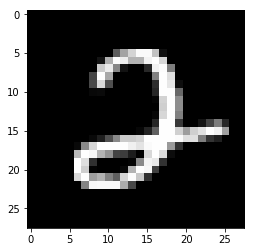

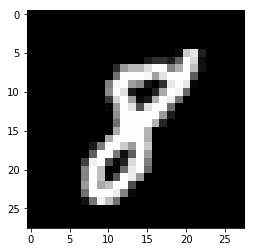

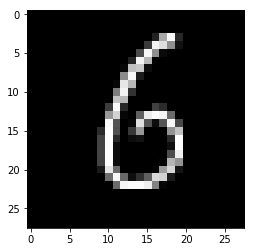

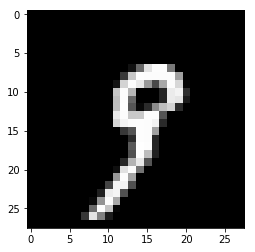

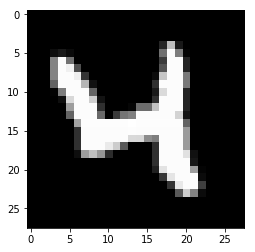

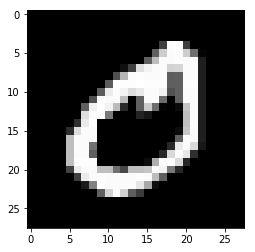

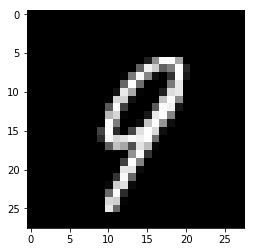

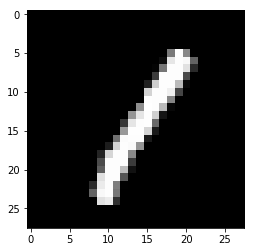

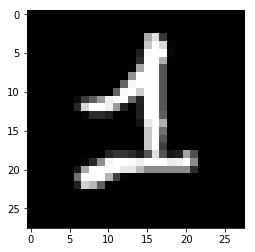

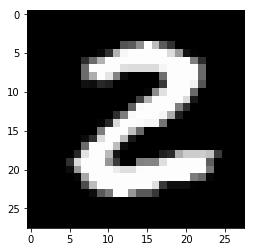

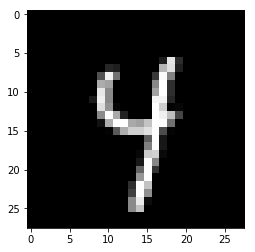

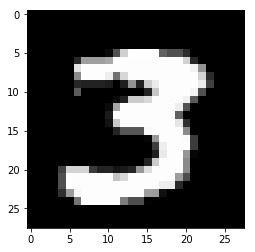

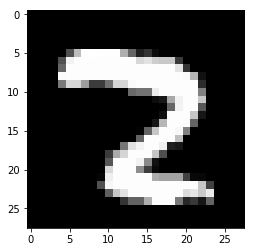

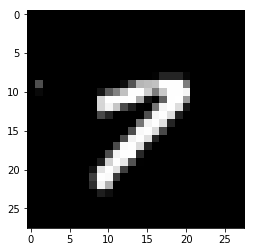

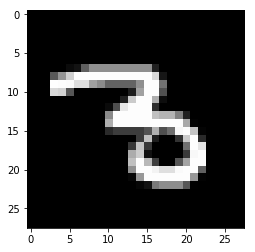

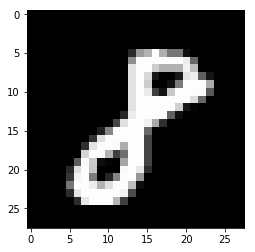

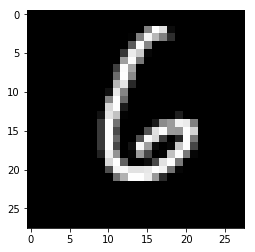

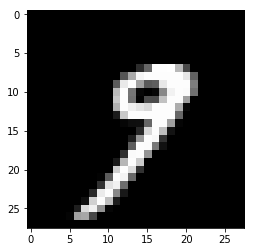

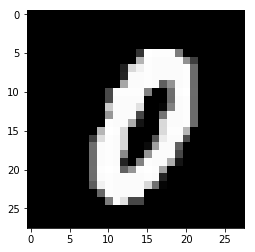

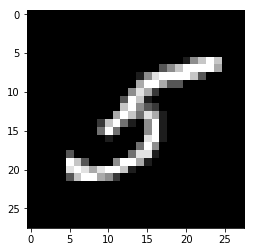

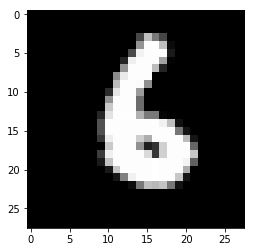

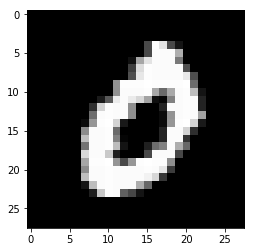

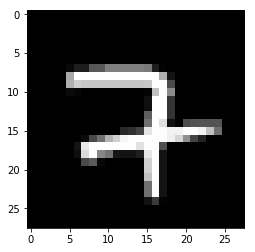

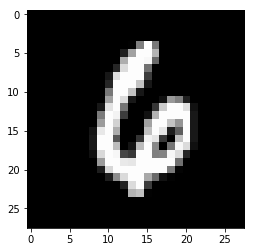

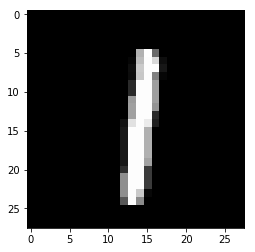

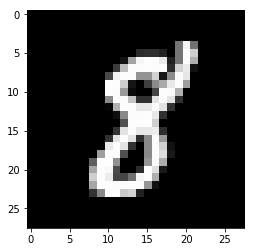

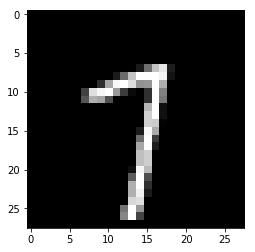

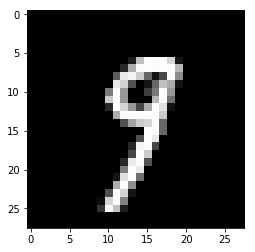

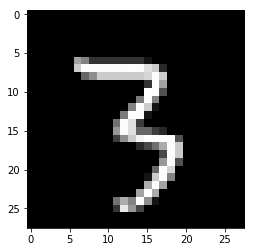

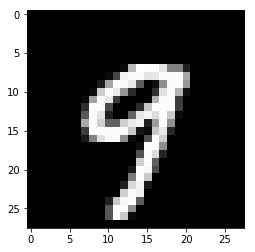

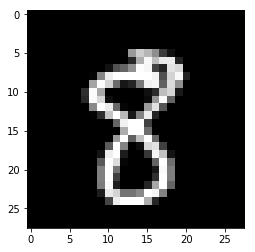

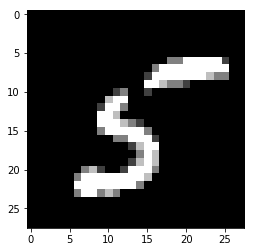

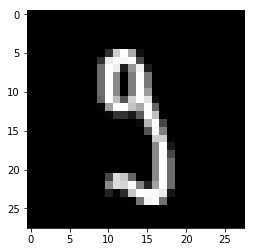

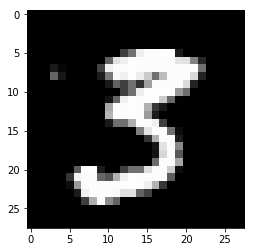

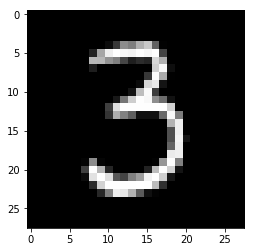

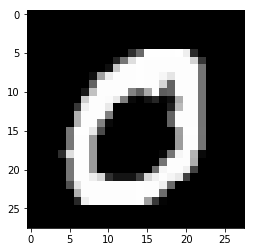

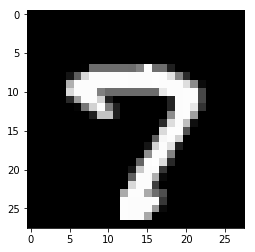

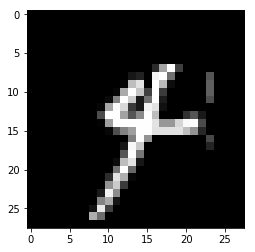

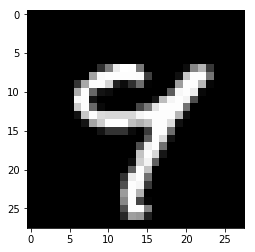

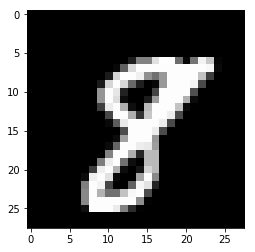

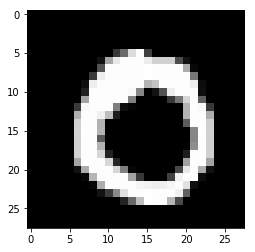

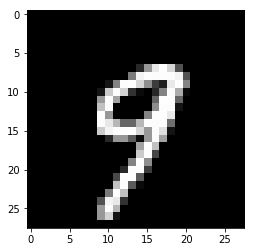

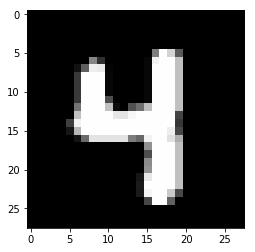

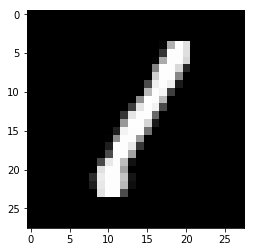

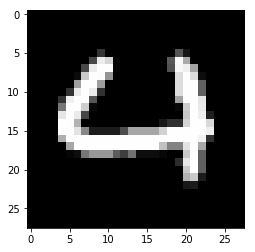

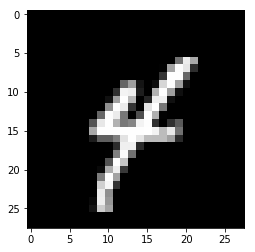

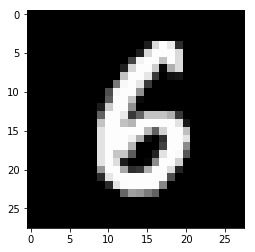

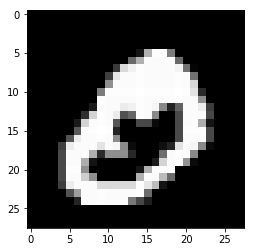

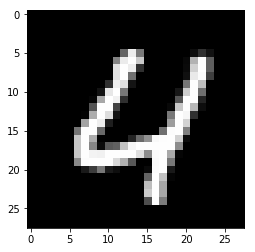

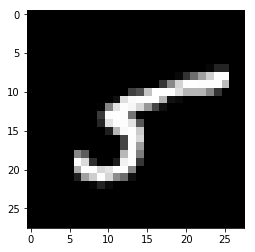

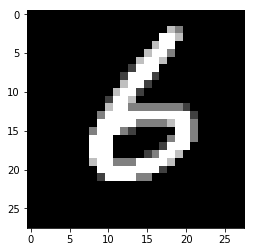

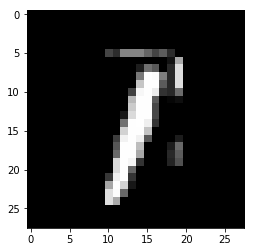

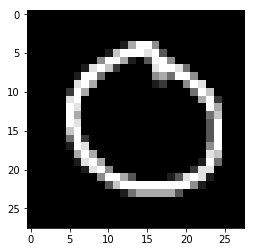

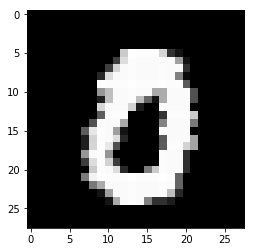

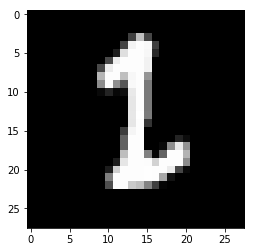

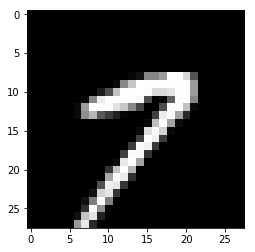

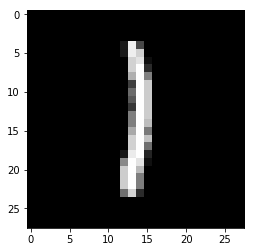

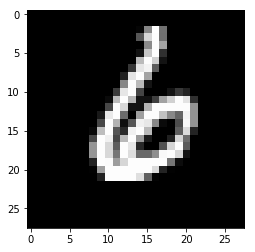

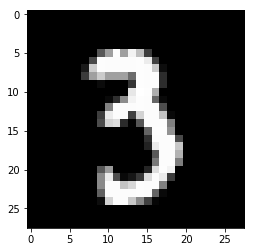

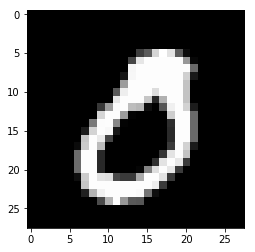

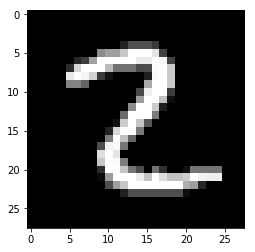

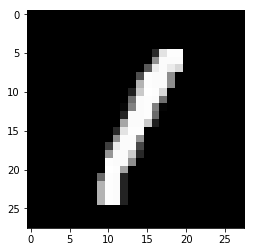

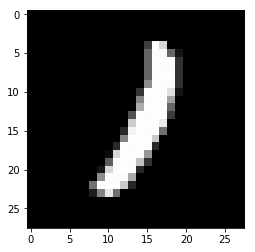

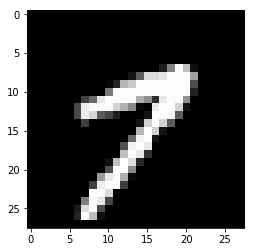

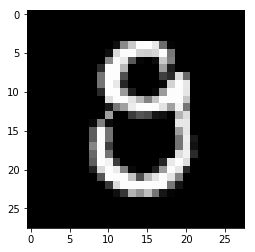

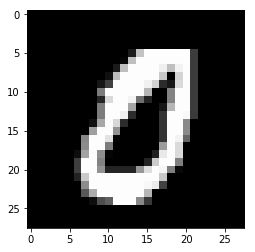

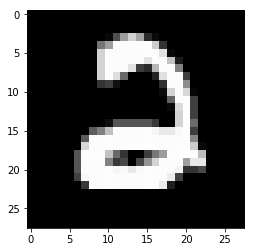

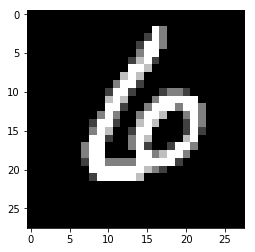

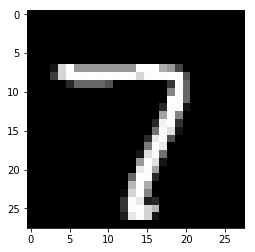

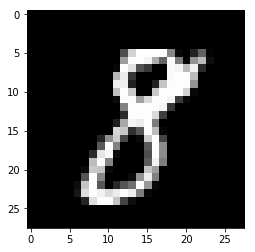

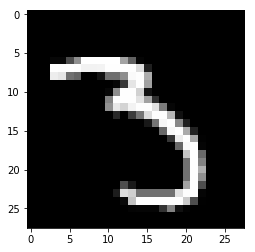

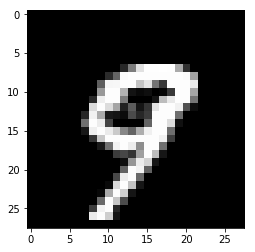

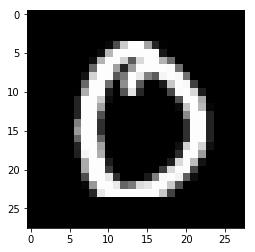

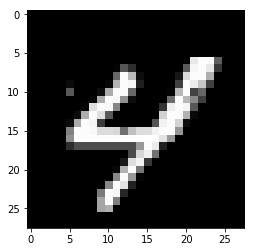

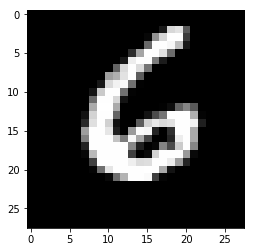

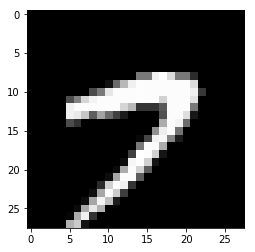

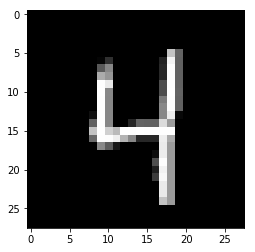

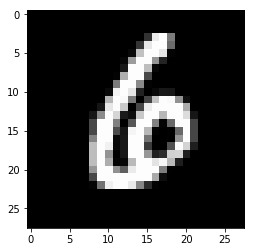

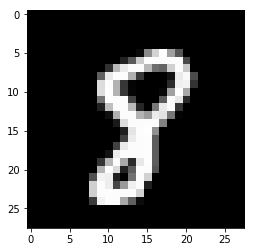

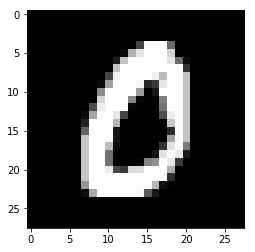

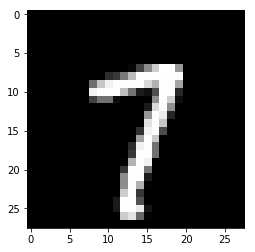

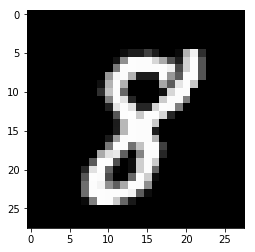

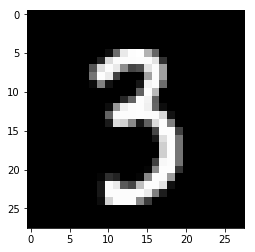

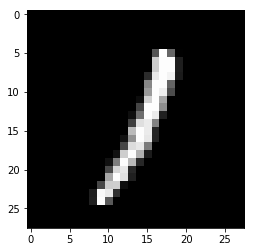

In [29]:
for i in range(100):
    plt.imshow(train_images[i], cmap='gray')
    plt.show()

In [30]:
img.shape

(28, 28)

In [31]:
img = img.reshape(-1, 28, 28, 1) # img.reshape(-1, 28, 28, 1)    -1: 알아서 (맞춰서 정)해라
img.shape

(1, 28, 28, 1)

In [32]:
img

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

(1, 14, 14, 5)
(5, 14, 14, 1)


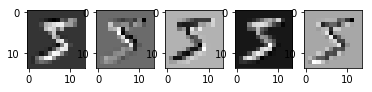

In [35]:
weight_init = keras.initializers.RandomNormal(stddev=0.01)
# 이게 filter! filter는 2차원 weight일 뿐 아직 정해진 값이 아니다. random.

conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), padding='SAME',
                             kernel_initializer=weight_init)(img)
print(conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3)

print(feature_maps.shape)

for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(14, 14), cmap='gray')
plt.show()

In [60]:
for i, feature_map in enumerate(feature_maps):
    print(i, feature_map)

0 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.0064426 ]
  [0.0370144 ]
  [0.04822885]
  [0.04898632]
  [0.02777133]
  [0.        ]]

 [[0.        ]
  [0.00117455]
  [0.04456652]
  [0.04065568]
  [0.03258076]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.04049112]
  [0.0477211 ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.03195318]
  [0.049578  ]
  [0.00476607]
  [0.        ]]

 [[0.        ]
  [0.03234448]
  [0.05347725]
  [0.05160761]
  [0.02268054]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.01541393]
  [0.01195492]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]]
1 [[[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.01866862]
  [ 0.0030462 ]
  [ 0.00683869]
  [ 0.00962132]
  [ 0.00539247]
  [ 0.        ]]

 [[ 0.        ]
  [

(1, 7, 7, 5)


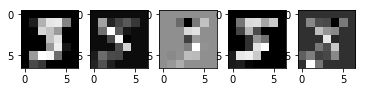

In [62]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i + 1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()

In [44]:
a = [1,2,3,4]
a

[1, 2, 3, 4]

In [58]:
for i in a:
    print(i)

1
2
3
4


In [63]:
for i in enumerate(a):
    print(i)

# (index, a값)

(0, 1)
(1, 2)
(2, 3)
(3, 4)


In [2]:
# np.swapaxes(배열, 인덱스1, 인덱스2): 인덱스1과 2의 구조를 교환

x = np.array(
    [
        [
            [
                [1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]
            ],
            [
                [4, 4, 4, 4], [5, 5, 5, 5], [6 , 6, 6,6]
            ]
        ]
    ])

In [7]:
print(x.shape)
print('======================\n', x)

(1, 2, 3, 4)
 [[[[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]

  [[4 4 4 4]
   [5 5 5 5]
   [6 6 6 6]]]]


In [5]:
x1 = np.swapaxes(x, 0, 1)
print(x1.shape)
print('======================\n', x1)

(2, 1, 3, 4)
 [[[[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]]


 [[[4 4 4 4]
   [5 5 5 5]
   [6 6 6 6]]]]


In [8]:
x1 = np.swapaxes(x, 0, 3)
print(x1.shape)
print('======================\n', x1)

(4, 2, 3, 1)
 [[[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]]


 [[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]]


 [[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]]


 [[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]]]
